# Titolo: La tecnica del chroma key
##### Autore: Belloni Laura 5075434
### Obbiettivo: implementare il chroma key

# Chroma key, una tecnica che permette la sovrapposizione di immagini
Chroma key è una tecnica usata per realizzare effetti di sovrapposizione di due diverse immagini o video.<br>
Consiste nel rimuovere il colore di sfondo da una prima immagine e sostituirlo con qualsiasi altra immagine.<br>
Viene detto green screen o blue screen a seconda del colore rimosso.<br><br>
Il blue e il verde vengono usati perchè non si scontrano con i colori della pelle.<br>
Storicamente nel cinema si usava lo schermo blu, ma nel tempo è diventato comune usare schermi verdi.<br>
I sensori della fotocamera digitale rilevano meglio i pixel di colore verde, più luminosi e più vividi ed anche l’occhio umano ne è maggiormente sensibile per motivi evolutivi.<br>

In [ ]:
from matplotlib import pyplot
import numpy as np
from PIL import Image
import cv2

# 1) Tecnica chroma key su diversi video
Partendo da un video con sfondo verde, si analizza un frame alla volta.<br>
Per ogni frame si crea una maschera<br>
applicando la maschera all'immagine orignale con alcune operazioni viene restituito lo stesso frame senza il colore verde<br>
Unendo questo risultato con una nuova immagine, per esempio rossa, si ottiene l'effetto desiderato<br>

In [ ]:
# add some video in folder src/all/green or src/all/blue
# then select the color you want to replace 
color = 0 # 1 if blue, else if green
# write in max_ the number of video green or blue
max_green = 0 #7
max_blue = 6

# image to change the background
imgpath = "src/background/windows.jpg"
image = cv2.imread(imgpath)

# If green
maxim = max_green
# defines the range of blue to be removed
lowerBound = np.array([36,25,25]) 
upperBound = np.array([86, 255,255]) 
videopath = "src/all/green/" # name the file video from 0 to n

# If blue
if(color==1): 
    maxim = max_blue
    # defines the range of blue to be removed
    lowerBound = np.array([36, 50, 70])
    upperBound = np.array([128,255,255])
    videopath = "src/all/blue/"
    
num = 0 
while(num<=maxim): # run all the videos
    video = cv2.VideoCapture("%s%d.mp4"%(videopath,num))
    cv2.startWindowThread()
    success,frame= video.read() # save the current frame and the success of the operation 
    
    # calculate the correct size to resize the video
    m=0
    scale_percent = 17
    if(frame.shape[1]<frame.shape[0]):
        scale_percent = 30
        m=1
    width = int(frame.shape[1] * scale_percent/100)
    height = int(frame.shape[0] * scale_percent/100)
    dim = (width, height)
    
    
    success = True
    while success: # read every frame of the video

        frame = cv2.resize(frame, dim) # resize the frame
        image = cv2.resize(image, dim) # resize the image for the background in the same dimension of the current frame

        hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV) # convert from bgr to hsv
        mask = cv2.inRange(hsv, lowerBound, upperBound) # create the mask
        res = cv2.bitwise_and(frame, frame, mask = mask) # apply the mask to the frame

        f = frame - res # 
        f = np.where(f == 0, image, f) 
        
        if(m==1):
            final = np.concatenate((frame, f), axis=1)
        else:
            final = np.concatenate((frame, f), axis=0)
        cv2.imshow("final", final)
        cv2.imshow("mask", mask)

        if cv2.waitKey(25) == 27:
            success = False
        success,frame= video.read()
    num +=1
    video.release()
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

Di seguito due video: il primo sostituisce il colore verde, il secondo il blu<br>
Entrambi mostrano<br>
- l'immagine originale e quella finale a sinistra<br>
- la maschera applicata per ottenere quel risulato<br>
<video controls src="src/screen/greenScreen.mp4" width="500" height="340" title="Green screen"></video><br>
<video controls src="src/screen/blueScreen.mp4" width="500" height="340" title="Blue screen"></video>

## -Operazione per ottenere un unico frame da un particolare video-
Nelle prossime due sezioni viene analizzato un solo frame di un solo video tra quelli mostrati in sequenza, per mostrare precisamente il processo che ne sta dietro.<br>
Ogni operazione effetuttata sul verde può essere applicata ad altri colori.<br><br>
Vengono i frame in un array per poterne analizzare uno in particolare.<br>

In [ ]:
# save into array every frame
n_frames = 1000
videopath = "src/video.mp4"
video = cv2.VideoCapture(videopath)
all = []
i = 0
while video.isOpened() and i < n_frames:
    success, frame = video.read()
    arr = np.array(frame)
    all.append(arr)
    i += 1

# select one frame
number_img = 0
frame = all[50] # the number of frame can change
cv2.imwrite("src/frame0.jpg", frame)


True

Di seguito uno dei video e il conseguente frame scelto da analizzare.<br>
<video controls src="src/video.mp4" width="500" height="340" title="video sfondo verde da analizzare"></video>
<img src="src/frame0.jpg" width="500" title="un frame del video a sinistra"></img>

# 2) Tecnica chroma key su un solo frame CON librerie
Si parte dalla prima immagine, l'Originale.<br>
Da questa si vuole ottenere il green screen sostituendo il colore verde con una nuova immagine rossa.<br>
Il colore verde viene definito come un range di valori in formato HSV - da verde chiaro a scuro. <br>
HSV è un formato più facile da gestire e interpretare.<br>

### 1) creazione della maschera
Attraverso una funzione di libreria (cv2.inRange) si crea una immagine della stessa dimensione di quella Originale, la Maschera.<br>
La Maschera evidenzia i punti dell'immagine che appartengono o meno al range di colore scelto.<br>
Si colora la Maschera di BIANCO nei punti in cui l'Originale è "verde", NERO altrimenti.<br>
Si ottiene un'immagine di colori BIANCO e NERO

### 2) Intersezione tra Maschera e Originale
Attraverso un'altra funzione di libreria (bitwise_and) si crea l'intersezione tra la Maschera e l'immagine Originale<br>
Il bitwise_and è l'operazione AND bit per bit.<br>
_Una caratteristica dei colori: il bianco è la somma di tutti i colori, il nero è la sottrazione di tutti i colori_<br>
<br>
L'intersezione tra la Maschera e l'Originale restituisce un'immagine che chiameremo Intersezione.<br>
-Le zone in cui l'originale è "verde" sono intersecate con il BIANCO, quindi la risultante rimane "verde"<br>
-Le zone al di fuori dal range sono intersecate con il NERO, quindi il colore risultante è NERO.<br><br>
Ho ottenuto un'immagine di colori "verde" e NERO.<br>
  
### 3) Sottrazione tra Originale e Intersezione
Questa operazione è la sottrazione tra matrici, Originale - Intersezione = Sottrazione.<br>
-Sottraendo dall'Originale il suo stesso colore "verde", ottengo il colore NERO<br>
-Sottraendo dall'Originale il colore NERO, rimangono i colori dell'immagine Originale.
Ho ottenuto un'immagine di colori DIVERSI da"verde" e NERO.<br>


### 4) Sostituzione verde con immagine di sfondo
Per finire si sostituisce con una funzione di libreria (np.where) l'immagine Sottrazione "rosso" con un'ImmagineDiSfondo salvata precedentemente.<br>
Si opera sull'immagine Sottrazione nella quale<br>
-Se l'immagine Sottrazione è di colore NERO, ritorna l'ImmagineDiSfondo<br>
Altrimenti non si fa nulla<br>
<br>
Questa operazione corrisponde alla somma tra immagine Sottrazione e ImmagineDiSfondo<br>
Si possono quindi riscrivere gli ultimi due punti (3 e 4) come:<br>
Originale - Intersezione + ImmagineDiSfondo .<br>
<br>
Di seguito il codice per:<br>
- definire il range e ridimensionare le immagini<br>
- effettuare le 4 operazioni principali descritte precedentemente<br>
- stampare i risultati

In [ ]:
# SELECT the image you want to run
# 0 -> green image from the video
# 1 green image
# 2 or 3 blue image
number_img = 0

frame = cv2.imread("src/frame%d.jpg"%number_img)
original = frame

# SELECT the COLOR you want to remove from the image
color = 0 # 1 if blue, else if green

if number_img==2 or number_img==3:
    color = 1

# define green
lowerBound = np.array([36,25,25])
upperBound = np.array([86, 255,255])
#define blue
if(color==1): 
    lowerBound = np.array([36, 50, 70]) 
    upperBound = np.array([128,255,255])

# resize
scale_percent = 17
if(frame.shape[1]<frame.shape[0]):
    scale_percent = 30
width = int(frame.shape[1] * scale_percent/100)
height = int(frame.shape[0] * scale_percent/100)
dim = (width, height)
frame = cv2.resize(frame, dim)

# create red image
# img = np.zeros(frame.shape)
# img[:,:,:] = (0,0,255) #bgr
# cv2.imwrite("red.jpg", img)

# read red image  from the folder and resize
red_imgpath = "src/background/red.jpg"
img = cv2.imread(red_imgpath)
img = cv2.resize(img, dim)

In [ ]:
# 1) create the mask
hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
mask = cv2.inRange(hsv, lowerBound, upperBound)

# 2) Intersection between mask and original image
res = cv2.bitwise_and(frame, frame, mask = mask)

# 3) subtraction between the original image and Intersection image
f = frame - res 
# 4) substitution with the red image
final = np.where(f == 0, img, f) 

# # 3 e 4) alternativo
# final = frame - res + img

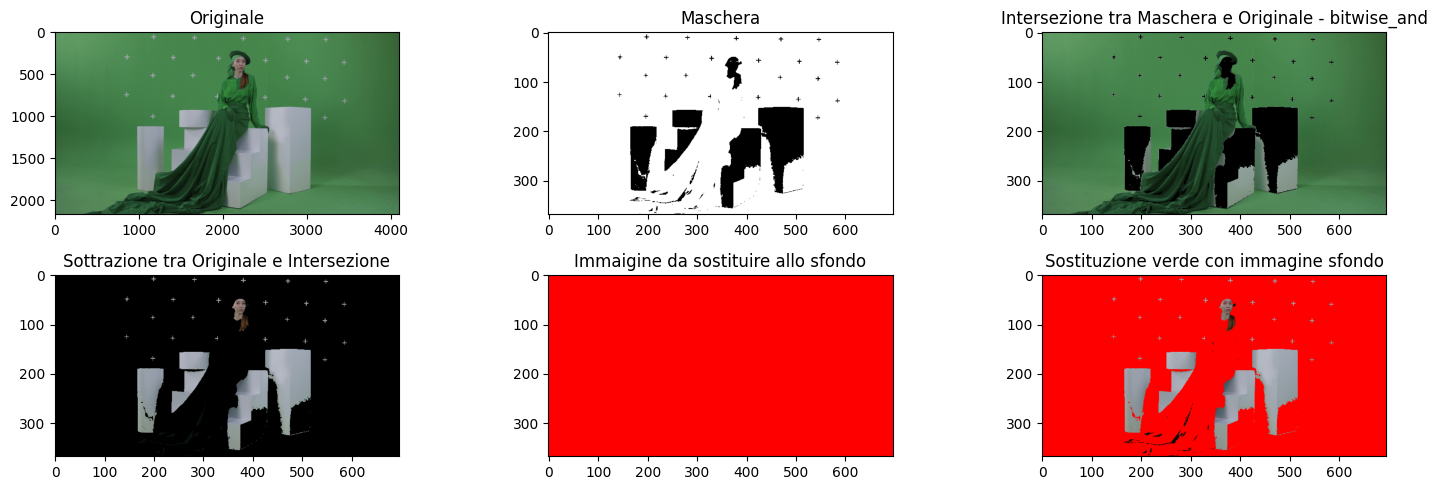

In [ ]:
# print the result
pyplot.figure(figsize=(15,5))
pyplot.subplot(2,3,1)
pyplot.title("Originale")
pyplot.imshow(cv2.cvtColor(original, cv2.COLOR_RGB2BGR))
pyplot.subplot(2,3,2)
pyplot.title("Maschera")
pyplot.imshow(cv2.cvtColor(mask, cv2.COLOR_RGB2BGR))
pyplot.subplot(2,3,3)
pyplot.title("Intersezione tra Maschera e Originale - bitwise_and")
pyplot.imshow(cv2.cvtColor(res, cv2.COLOR_RGB2BGR))
pyplot.subplot(2,3,4)
pyplot.title("Sottrazione tra Originale e Intersezione")
pyplot.imshow(cv2.cvtColor(f, cv2.COLOR_RGB2BGR))
pyplot.subplot(2,3,5)
pyplot.title("Immaigine da sostituire allo sfondo")
pyplot.imshow(cv2.cvtColor(img, cv2.COLOR_RGB2BGR))
pyplot.subplot(2,3,6)
pyplot.title("Sostituzione verde con immagine sfondo")
pyplot.imshow(cv2.cvtColor(final, cv2.COLOR_RGB2BGR))
pyplot.tight_layout()
pyplot.show()

### Analisi risultati implementazione CON uso di librerie
Le immagini ottenute sono:
- Originale, l'immagine di partenza
- Maschera, corrisponde al punto 1 descritto precedentemente
- L'intersezione tra Maschera e Originale, corrisponde al punto 2
- Sottrazione tra Originale e Intersezione, corrisponde al punto 3
- Immagine da sostituire come sfondo
- Sostituzione del verde con l'immagine di sfondo, corrisponde al punto 4 

# 3) Tecnica chroma key su un solo frame SENZA librerie
Questa sezione è suddivisa nei seguenti punti, in ordine di come procedere per realizzare questa tecnica.<br>
1) Conversione dell'immagine Originale in array e analisi
2) Creazione della Maschera
3) Applicazione della Maschera
4) Creazione dell'Immaigine di sfondo
5) Sostituzione del colore verde con l'Immagine di sfondo
   
### 1) Conversione dell'immagine in array e analisi
Di seguito riportato come implementare queste operazioini senza libreria.<br>
Per prima cosa si converte l'immagine in un array<br><br>
Analisi delle informazioni sull'immagine:<br>
L'immagine è diventata una matrice (numpy.ndarray) di 3 dimensioni.<br>
La prima dimensione rappresenta il numero di righe, quindi l'altezza dell'immagine (in questo caso 2160).<br>
La seconda dimensione rappresenta il numero di colonne, quindi la larghezza dell'immagine (in questo caso 4096).<br>
La terza dimensione rappresenta il colore in ogni punto dell'immagine.<br><br>
Essendo il colore in formato RGB, avrò all'indice 0 il rosso, al 1 il verde e al terzo il blu ( img[][][0=r, 1=g, 2=b] ).<br>
Il tipo di dato è uint8, cioè 8-bit unsigned integers (utile per sapere con quali librerie operare per stampare o convertire formati colori).<br>
<br>
0   [[[r, g, b]<br>
1     [r, g, b]<br>
2     [r, g, b]<br>
         ...<br>
4096  [r, g, b]]<br>
                ]<br>
per 2160 volte<br>

type of data: <class 'numpy.ndarray'>
type : uint8
number of axes: 3
row, column, dimension: (2160, 4096, 3)
total number of elements: 26542080
format of color: RGB


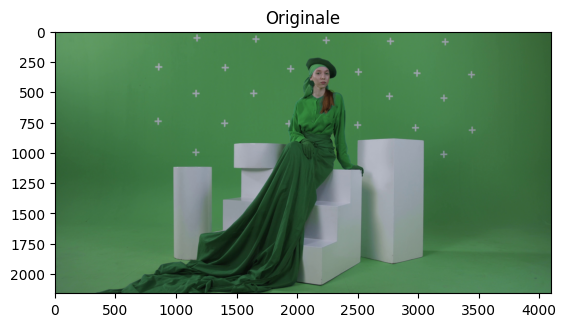

In [ ]:
# select and read the image from the folder
# 0,1 green - 2,3 blue
number_img = 0
image = Image.open("src/frame%d.jpg"%number_img)

# convert image to numpy array
data = np.asarray(image)

# print data
print("type of data: %s"%type(data))
print("type : %s"%data[0][0][0].dtype)
print("number of axes: %d"%data.ndim)
print("row, column, dimension: %s"%str(data.shape))
print("total number of elements: %d"%data.size)
print("format of color: %s"%image.mode)

# print Original image
pyplot.title("Originale")
pyplot.imshow(image)
pyplot.show()

### 2) Creazione della Maschera
Una volta esaminati i dati dell'immagine Originale si crea la maschera.<br>
La maschera è un array delle stesse dimensioni dell'immagine originale.<br>
<br>
Viene scelto un intervallo di colori, in questo caso verde (o blu).<br>
Per ogni "pixel" che appartiene all'intervallo scelto, si colora il corrispondente pixel nella maschera di bianco<br>
Tutto il resto della maschera è di colore nero.<br>
<br>

<b>Differenza dall'implementazione CON libreria.<br></b>
Per maggiore efficienza si sarebbe potuto implemntare la maschera in boolean, come succede nella funzione di libreria cv2.inRange<br>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


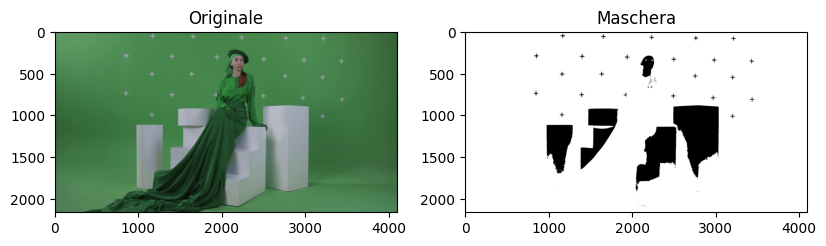

In [ ]:
mask = np.zeros(data.shape) # create the mask all black

# declare color range
blue_range = ((data[:,:,2]>data[:,:,0]) & (data[:,:,2]>data[:,:,1])) | (data[:,:,1]<40) | (data[:,:,0]<40)
green_range = ((data[:,:,1]>data[:,:,0]) & (data[:,:,1]>data[:,:,2])) | (data[:,:,0]<40) | (data[:,:,2]<40)

color_range = green_range
if number_img == 2 or number_img==3:
    color_range = blue_range
#cloro_range =  # write the range of color you chose

mask[color_range>0] = (255,255,255) # color with white if is in the color range

# print the result
pyplot.figure(figsize=(15,5))
pyplot.subplot(1,3,1)
pyplot.title("Originale")
pyplot.imshow(data)
pyplot.subplot(1,3,2)
pyplot.title("Maschera")
pyplot.imshow(mask)
pyplot.show()

### 3) Applicazione della Maschera
Viene creata una copia dell'immagne Originale e si opera su questa.<br>
Per ogni posto nella matrice della Maschera di colore BIANCO, restituisco il NERO nello stesso posto nella matrice copia dell'Originale<br>
Altrimenti lascia la matrice copia invariata.<br><br>
Si ottiene un'immagine di colore NERO per le zone appartententi al range verde, e come l'immagine Originale altrimenti.<br>

<br>
<b>Differenza dall'implementazione CON libreria.<br></b>
In quel caso si faceva prima l'Intersezione, poi la sottrazione ed infine la Sostituzione.<br>


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


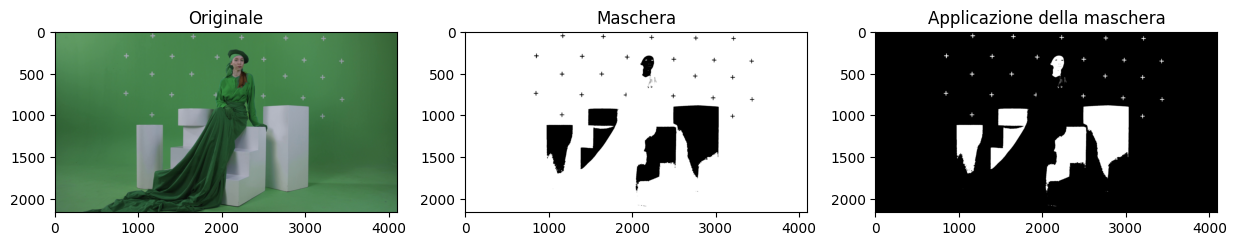

In [ ]:
res = data.copy() # create a copy of the Origina image

# for each pixel different from black, change the copy of the original image with black
condition = (mask[:,:,0]>0) & (mask[:,:,1]>0) & (mask[:,:,2]>0)
res[condition] = (0)

# print the result
pyplot.figure(figsize=(15,5))
pyplot.subplot(1,3,1)
pyplot.title("Originale")
pyplot.imshow(data)
pyplot.subplot(1,3,2)
pyplot.title("Maschera")
pyplot.imshow(mask)
pyplot.subplot(1,3,3)
pyplot.title("Applicazione della maschera")
pyplot.imshow(res)
pyplot.show()

### 4) Creazione dell'Immaigine di sfondo
Viene creata un immagine della stessa dimensione dell'immagine di partenza, così da non doverla ridimensionare.<br>
Si crea di un colore diverso da quelli che si stanno analizzando per chiarezza, in questo caso rosso.<br>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


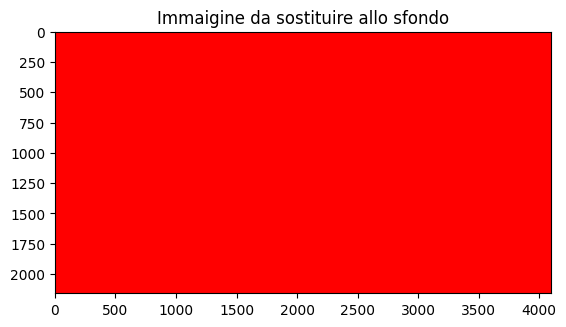

In [ ]:
img = np.zeros(data.shape)
img[:,:,:] = (255,0,0) # rgb

pyplot.title("Immaigine da sostituire allo sfondo")
pyplot.imshow(img)
pyplot.show()

### 5) Sostituzione del colore verde con l'Immagine di sfondo
La fase finale è scomposta in due risultati:
1) per ogni valore in cui l'Applicazione della Maschera è NERO , viene sostituito nella stessa immagine con un colore in questo caso GIALLO<br>
2) per ogni valore in cui l'Applicazione della Maschera è NERO , viene sostituito nello stesso punto con il colore esatto contenuto nell'immagine di sfondo creata in questo caso rossa.<br>

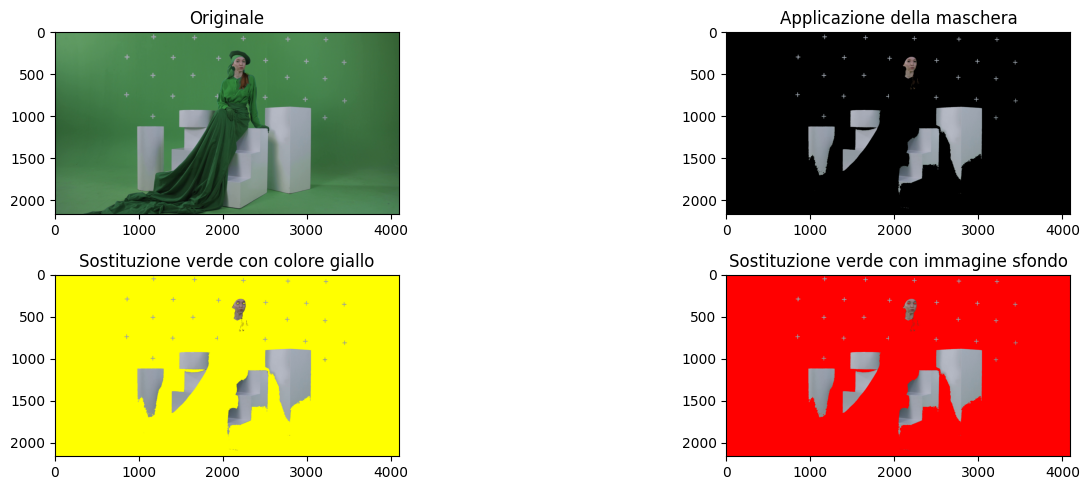

In [ ]:
color_matrix = res.copy()
color_num = res.copy()
red = img.copy()

black = (res[:,:,0]==0) & (res[:,:,1]==0) & (res[:,:,2]==0)
color_num[condition] = (255,255,0) # color yellow
color_matrix[black] = red[black] # background image

pyplot.figure(figsize=(15,5))
pyplot.subplot(2,2,1)
pyplot.title("Originale")
pyplot.imshow(data)
pyplot.subplot(2,2,2)
pyplot.title("Applicazione della maschera")
pyplot.imshow(res)
pyplot.subplot(2,2,3)
pyplot.title("Sostituzione verde con colore giallo")
pyplot.imshow(color_num)
pyplot.subplot(2,2,4)
pyplot.title("Sostituzione verde con immagine sfondo")
pyplot.imshow(color_matrix)
pyplot.tight_layout()
pyplot.show()

In [ ]:
cv2.imwrite("src/result/img_no_lib.jpg",cv2.cvtColor(color_matrix, cv2.COLOR_RGB2BGR))
cv2.imwrite("src/result/img_lib.jpg",final)

True

# Analisi dei risultati
Di seguito le immagini ottenute dalle due implementazioni differenti.<br>
A destra senza uso di librerie, a sinistra con uso di librerie.<br><br>
<img src="src/result/img_no_lib.jpg" width="500"></img>
<img src="src/result/img_lib.jpg" width="500"></img>

I risultati sono molto simili.<br>
L'immagine ottenuta senza uso di librerie (sinistra) è più definita e comprende un range di rosso maggiore.<br>
Questo risultato potrebbe essere causato dalla scelta iniziale del range di verde.<br>
Per l'immagine ottenuta <b>con librerie</b> (destra) è stato scelto un range di verde in formato HSV.<br>
Per l'immagine ottenuta <b>senza librerie</b> si è usata una condizione sui valori dell'immagine in RGB.<br>
La condizione principale era che il rosso o il blu fossero minori di 40.<br>
Questa non è la conversione esatta del range HSV in RGB.<br>
Questo può essere una motivazione per spiegare le differenze ottenute<br>

# Operazioni fallite: da HSV a RGB 
Di seguito un'implementazione della conversione da RGB ad HSV<br>
Non è riuscita perfettamente ma è un punto di partenza per capire a fondo la differenza tra questi due formati.<br>
La conversione:<br><br>
<img src="src/sp/rgb2hsv.png" width="500"></img>

In [ ]:
# convert from rgb to hsv
conv_img = np.zeros((data.shape))
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
                R = data[i][j][0]
                G = data[i][j][1]
                B = data[i][j][2]
                # value
                v = max(R,G,B) 
                # saturation
                minimum = min(R,G,B)
                if (v != 0):
                    s = (v-minimum)/v
                else:
                    s = 0
                # hue
                if (v == R):
                    h = 60*(G-B)/v-minimum
                elif (v == G):
                    h = 120 + 60*(B-R)/v-minimum
                elif (v == B):
                    h = 240 + 60*(R-G)/v-minimum
                elif (R == G and G == B):
                    h = 0
                if(h<0):
                    h = h+360
                
                conv_img[i][j][0] = h
                conv_img[i][j][1] = s
                conv_img[i][j][2] = v

from matplotlib.colors import hsv_to_rgb
rgb = hsv_to_rgb(conv_img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


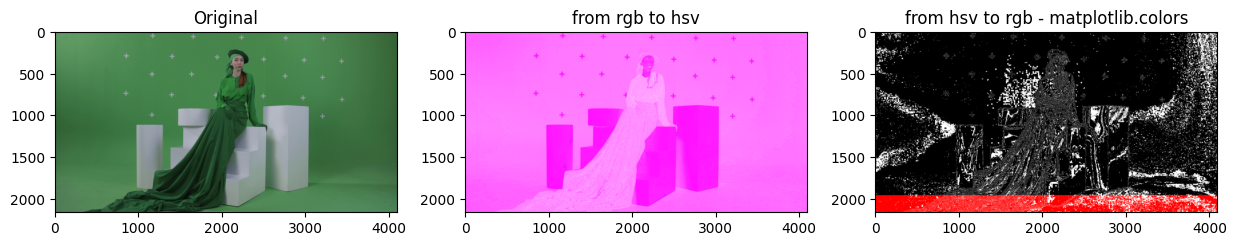

In [ ]:
# print the result
pyplot.figure(figsize=(15,5))
pyplot.subplot(1,3,1)
pyplot.title("Original")
pyplot.imshow(data)
pyplot.subplot(1,3,2)
pyplot.title("from rgb to hsv")
pyplot.imshow(conv_img)
pyplot.subplot(1,3,3)
pyplot.title("from hsv to rgb - matplotlib.colors")
pyplot.imshow(rgb)
pyplot.show()

le immagini riportate sono:<br>
-l'immagine di partenza<br>
-la conversione da RGB ad HSV implementata senza utilizzo di librerie<br>
-la conversione successiva da HSV a RGB.<br>
<br>
Di seguito dei grafici che mostrano in 3D come sono rappresentati i colori di questa particolare immagine Originale nei due differenti formati.<br>
A sinistra RGB, a destra HSV.<br>
<img src="src/sp/plot_rgb.png" width="300"></img>
<img src="src/sp/plot_hsv.png" width="300"></img><br>
Il risultato della conversione non sembra del tutto errato ma rosa perchè stampato come RGB.<br> 
Quando viene riconvertito con la funzione di libreria (matplotlib.color) HSV->RGB il formato non viene riconosciuto e stampa l'ultima immagine come risultato.<br>
Convertendo con la libreria cv2 invece non riconosce le dimensioni.